<a href="https://colab.research.google.com/github/AdminGirl/Saida-s-project/blob/main/House_Price_Prediction_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
statMDL=smf.ols('price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+grade+condition', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     3896.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:57:30   Log-Likelihood:            -2.9878e+05
No. Observations:               21613   AIC:                         5.976e+05
Df Residuals:                   21605   BIC:                         5.976e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.201e+05   1.82e+04    -39.524      

In [ ]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','condition']]
y = df['price']

**Linear Regression**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=3)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Intercept: -744322.5548794841


,Coefficient
bedrooms,-39134.691394
bathrooms,-15318.714489
sqft_living,216.108513
sqft_lot,-0.282681
floors,-22112.613657
grade,107041.054380
condition,63441.660392


In [ ]:
predictions = linreg.predict(x_test)


In [ ]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [-3.91346914e+04 -1.53187145e+04  2.16108513e+02 -2.82680791e-01
 -2.21126137e+04  1.07041054e+05  6.34416604e+04]
Intercept: -744322.5548794841
MAE: 157596.70161179907
MSE: 59557768929.85953
RMSE: 244044.60438587764
AccuracyII: 56.425259861009025 %
R2: 0.5642525986100903


In [ ]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.5532648409805125
Test set Accuracy:  0.5642525986100903


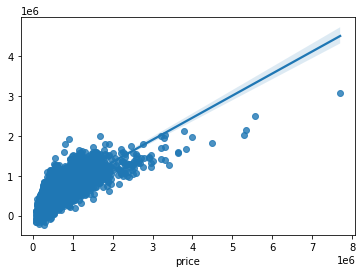

In [ ]:
sns.regplot(x=y_test, y=predictions)

In [ ]:
new_observation = [[3,2,1700,900,1,8,4]]
linreg.predict(new_observation)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([562748.463979])

**Polynomial Features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

polymodel = LinearRegression()
polymodel.fit(x_, y)
polymodel.coef_

array([ 4.34340876e-02,  5.88872992e+04, -2.33581741e+05, -1.72329442e+02,
       -3.90124357e-01, -3.02751406e+05, -1.06292213e+05, -2.54995641e+05,
        2.04261675e+03, -5.44429381e+03, -8.27746013e+00, -5.95521070e-02,
        2.73104794e+04, -6.94014901e+03, -1.45669724e+04,  3.14878908e+04,
       -1.28001463e+01,  1.96603546e-01, -3.76080139e+04,  2.30065712e+04,
        7.18761305e+03,  2.56858384e-02, -8.46729516e-04, -3.21262887e+01,
        2.53457447e+01,  3.49588424e+01,  7.99417439e-07,  4.60108665e-01,
        1.72294338e-01, -1.57211601e-01,  4.86606191e+04, -4.08059747e+03,
        6.85607391e+04,  4.66563665e+03,  1.96427013e+04,  7.17357129e+03])

In [ ]:
predictions1 = polymodel.predict(x_test_)

In [ ]:
print('Coefficients:', polymodel.coef_)
print('Intercept:', polymodel.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = polymodel.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [ 4.34340876e-02  5.88872992e+04 -2.33581741e+05 -1.72329442e+02
 -3.90124357e-01 -3.02751406e+05 -1.06292213e+05 -2.54995641e+05
  2.04261675e+03 -5.44429381e+03 -8.27746013e+00 -5.95521070e-02
  2.73104794e+04 -6.94014901e+03 -1.45669724e+04  3.14878908e+04
 -1.28001463e+01  1.96603546e-01 -3.76080139e+04  2.30065712e+04
  7.18761305e+03  2.56858384e-02 -8.46729516e-04 -3.21262887e+01
  2.53457447e+01  3.49588424e+01  7.99417439e-07  4.60108665e-01
  1.72294338e-01 -1.57211601e-01  4.86606191e+04 -4.08059747e+03
  6.85607391e+04  4.66563665e+03  1.96427013e+04  7.17357129e+03]
Intercept: 1225900.6293252734
MAE: 143710.65428091693
MSE: 46390383077.51647
RMSE: 215384.26840769144
AccuracyII: 66.05902262840534 %
